# 1 - Introduction 


Nama : Geraldine Dewarani

Batch : FTDS-019-RMT

Dataset : churn dataset

Objectives :  to assist a company in minimizing the churn risk of its customers. We aim to predict which customers are likely to churn using the provided dataset.

# 2 - Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras import Model

from sklearn.metrics import classification_report

from tensorflow.keras.layers import BatchNormalization

import pickle

# 3 - Data Loading

In [2]:
#Mount data from gdrive to colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Data Loading
data = pd.read_csv('/content/drive/MyDrive/GC-H8/churn.csv')

In [4]:
data

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

In [6]:
data.isnull().sum()

user_id                            0
age                                0
gender                            59
region_category                 5431
membership_category                0
joining_date                       0
joined_through_referral         5442
preferred_offer_types            288
medium_of_operation             5395
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

# 4 EDA

## Churn risk score (target feature)

In [7]:
# Group counts for churn_risk_score
churn_counts = data['churn_risk_score'].value_counts().reset_index().rename(columns={'index': 'Churn Risk Score', 'churn_risk_score': 'Count'})
# Sort the table by Churn Risk Score
churn_counts = churn_counts.sort_values('Churn Risk Score')
print(churn_counts)

   Churn Risk Score  Count
1                 0  16992
0                 1  20018


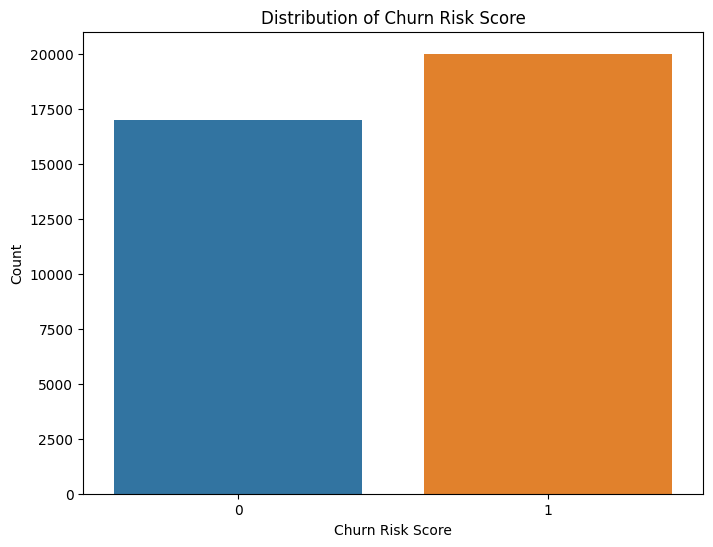

In [8]:
# Create bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Churn Risk Score', y='Count', data=churn_counts)
plt.title('Distribution of Churn Risk Score')
plt.xlabel('Churn Risk Score')
plt.ylabel('Count')
plt.show()

In [9]:
# Calculate the proportions
total_samples = len(data)
proportion_0 = churn_counts.loc[churn_counts['Churn Risk Score'] == 0, 'Count'] / total_samples
proportion_1 = churn_counts.loc[churn_counts['Churn Risk Score'] == 1, 'Count'] / total_samples

# Calculate the range
imbalance_range = proportion_1.values[0] / proportion_0.values[0]

print("Proportion Range of Imbalance:")
print(imbalance_range)

Proportion Range of Imbalance:
1.1780838041431263


From the table and counts for the Churn Risk Score categories:

Churn Risk Score 0: The count of customers in this category is 16,992. They are less likely to discontinue using the company's products or services.

Churn Risk Score 1: The count of customers in this category is 20,018. This indicates a relatively higher number of customers who have a churn risk.This risk may have led to customers discontinuing their usage of the company's products or services.

but, from the technical side this data looks pretty balance so no need to handle any imbalancity. 

## Analyze numeric feature

In [10]:
numeric_features = ["age", "days_since_last_login", "avg_time_spent", "avg_transaction_value", "avg_frequency_login_days", "points_in_wallet"]
data_numeric = data[numeric_features]

data_numeric.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet
count,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000
mean,37.120697,-41.943502,279.201356,29272.430216,14.659540,623.590885
std,15.866834,228.875324,330.017336,19445.963492,9.478756,270.218956
min,10.000000,-999.000000,0.000000,800.460000,0.000000,0.000000
25%,23.000000,8.000000,60.122500,14177.835000,7.000000,574.220000
50%,37.000000,12.000000,161.770000,27554.485000,14.000000,680.400000
75%,51.000000,16.000000,356.525000,40858.672500,22.000000,756.990000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761


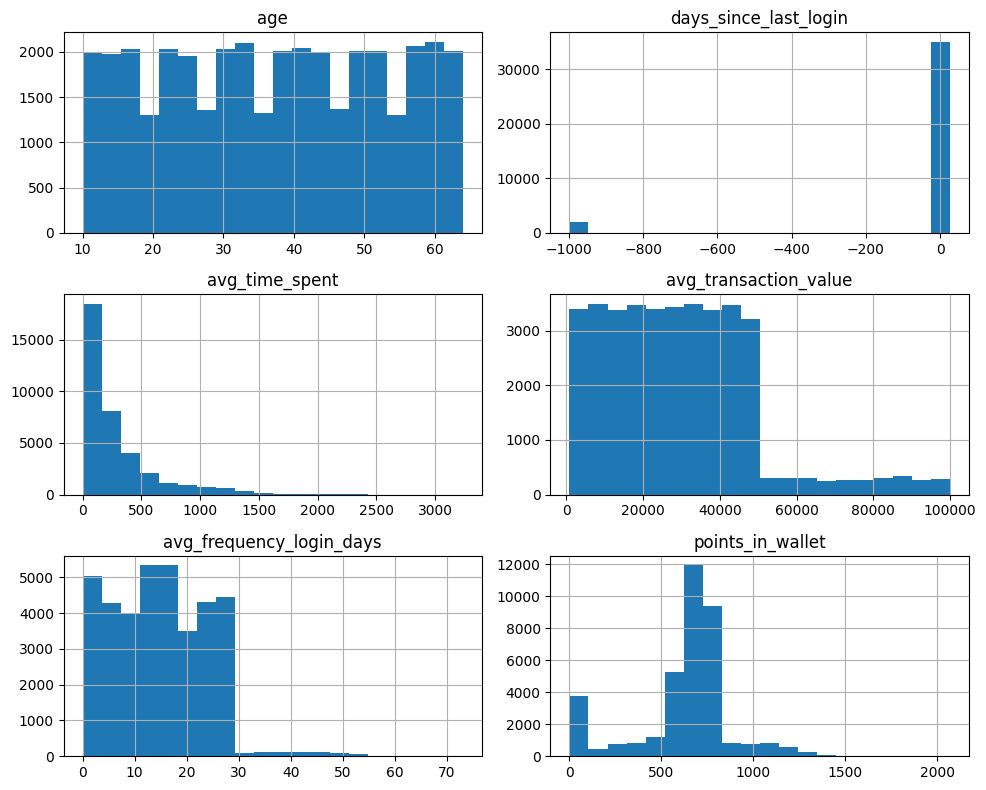

In [11]:
# Plot histograms for numeric features
data_numeric.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

Based on the provided statistics for numerical features in the dataset, we can see that : 

1. Age: The customers in the dataset have an average age of approximately 37 years. The age range of customers varies from 10 to 64 years. 

2. Days Since Last Login: The average number of days since the last login is around -42. This negative value suggests that there might be missing or incorrect data in this column

3. Average Time Spent: On average, customers spend around 279 seconds (or approximately 4.65 minutes) on the platform per session. 

4. Average Transaction Value: The average transaction value is approximately 29,272 units. This metric indicates the typical amount spent by customers during transactions. 

5. Average Frequency of Login Days: The average frequency of login days is approximately 14 days. This represents the average number of days between consecutive logins by customers. 

6. Points in Wallet: Customers have an average of 623 points in their wallets. This feature likely represents a loyalty or rewards program where customers accumulate points. 

## Analyze categorical feature

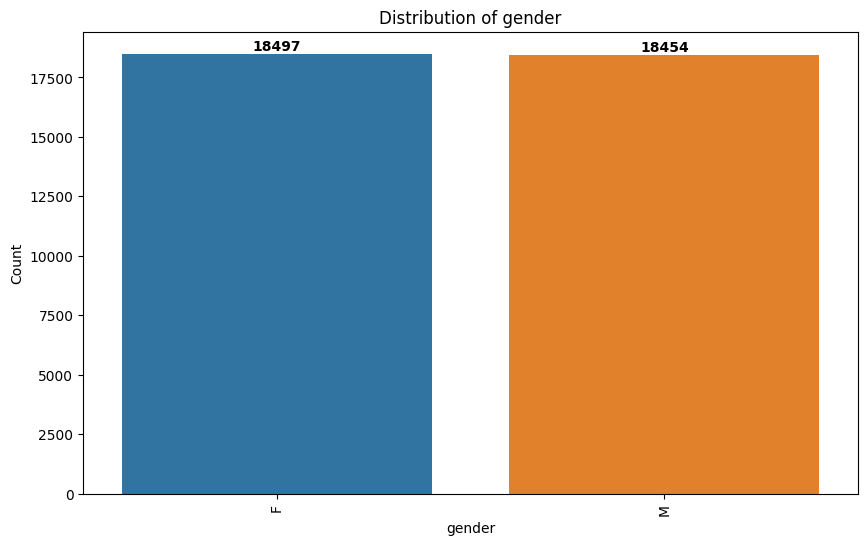

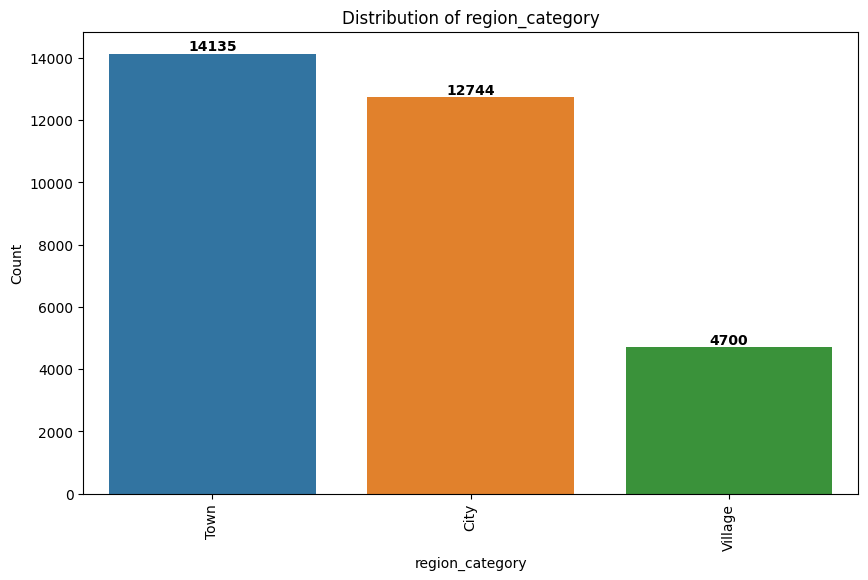

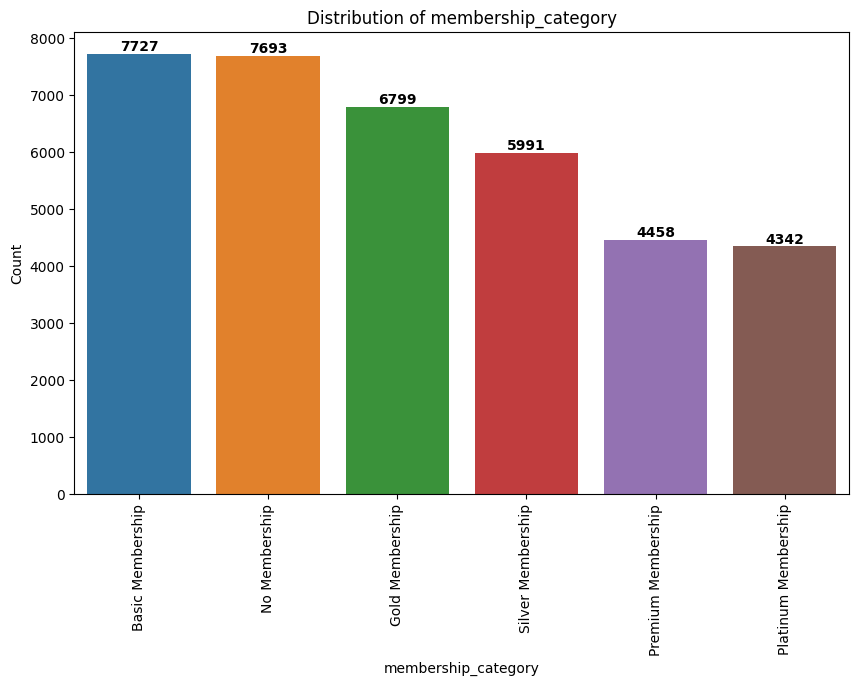

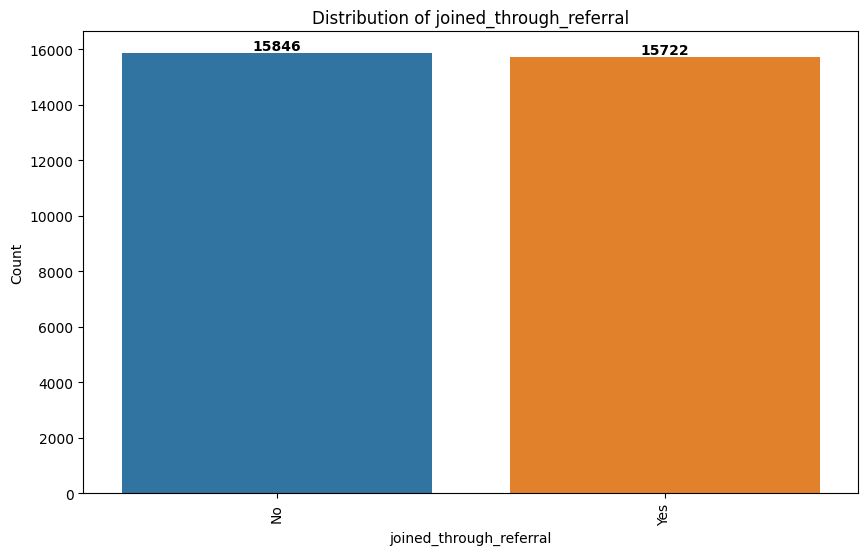

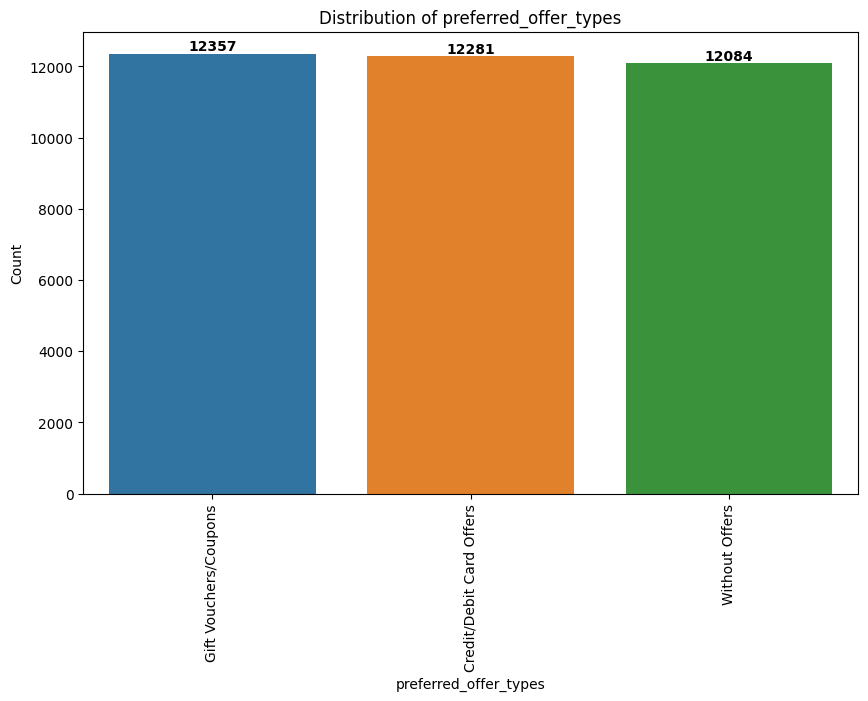

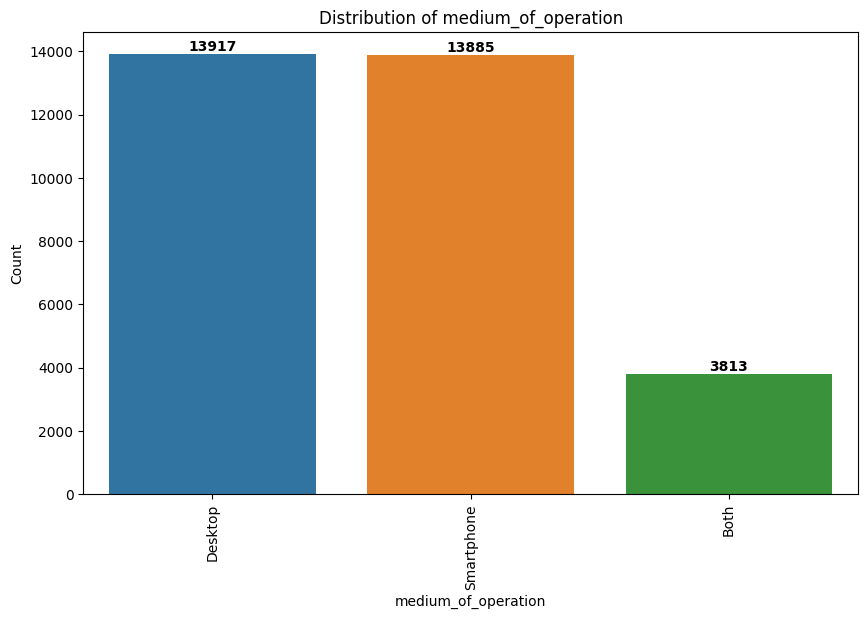

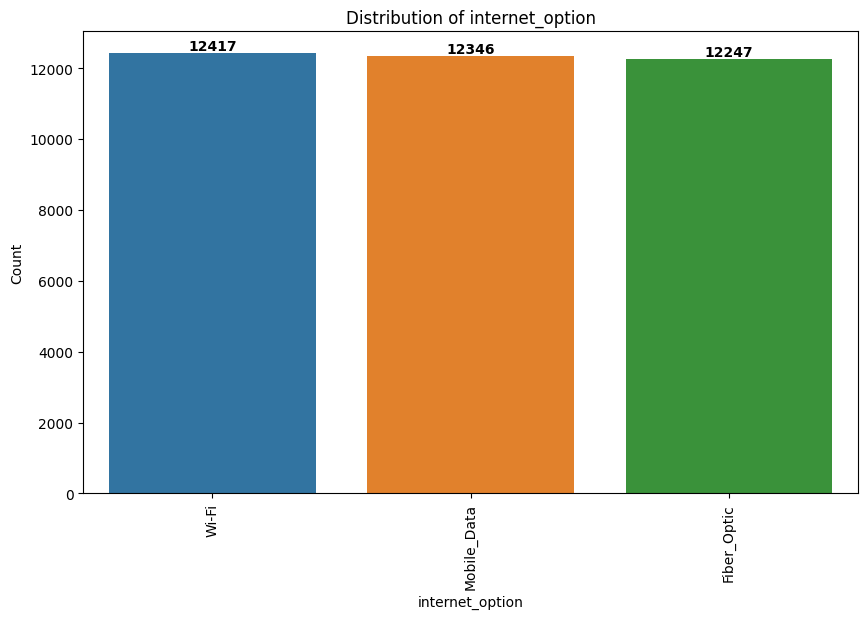

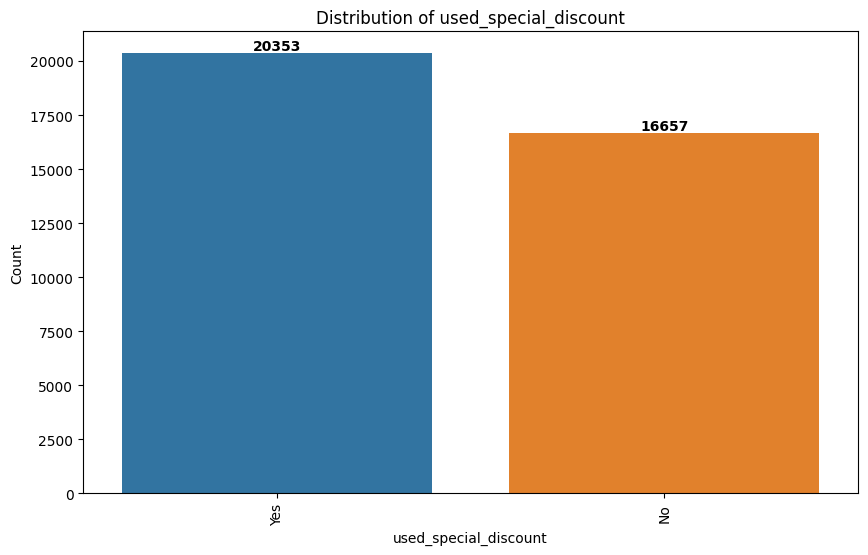

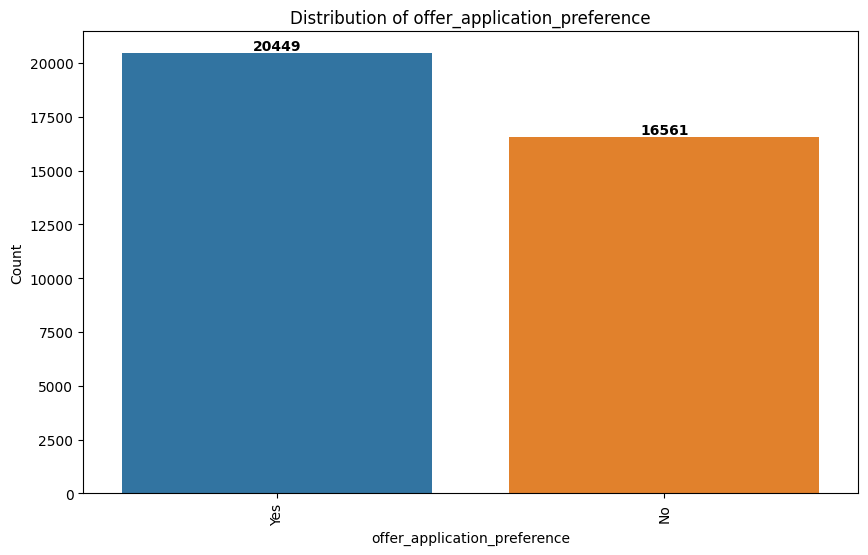

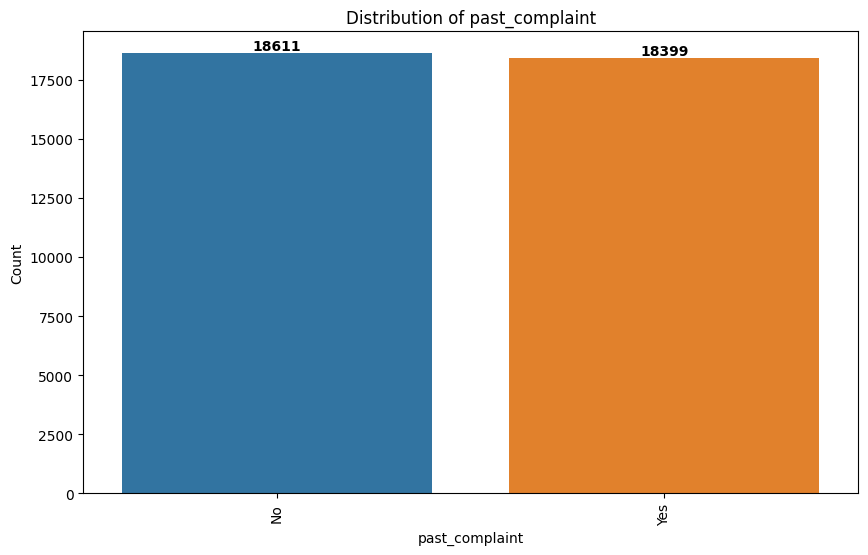

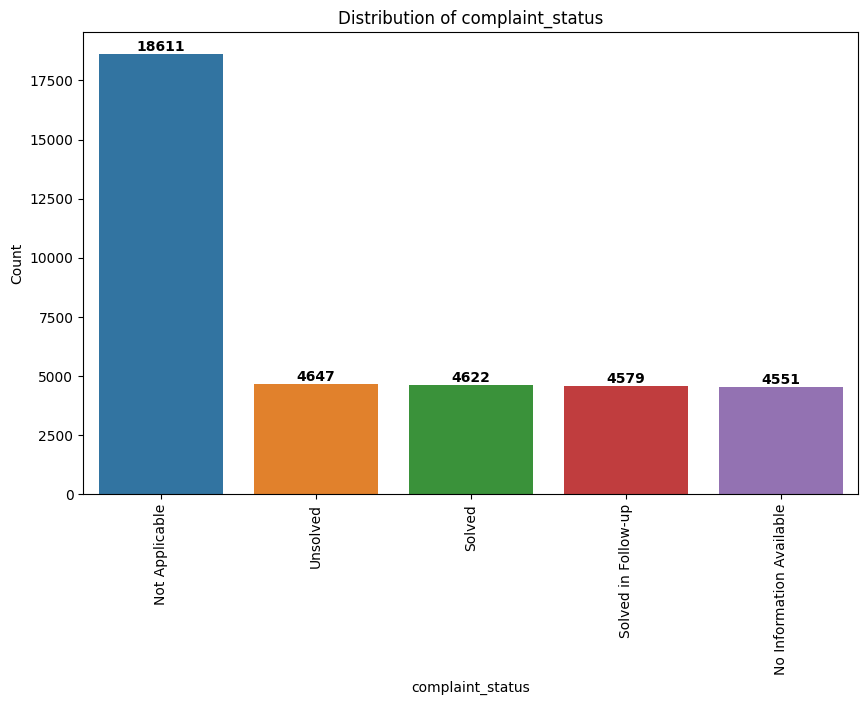

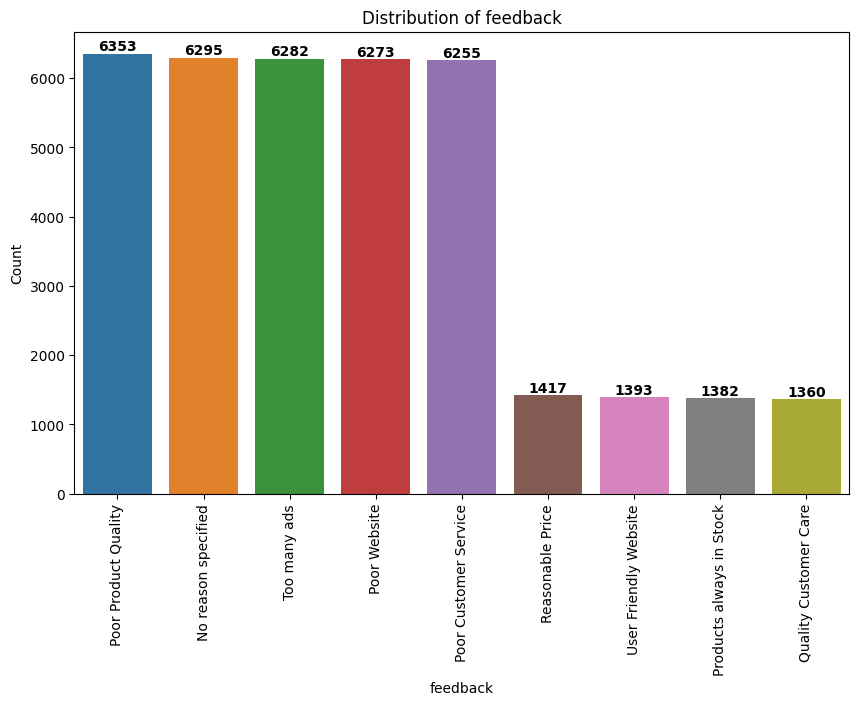

In [12]:
categorical_features = ["gender", "region_category", "membership_category", "joined_through_referral", "preferred_offer_types", "medium_of_operation", "internet_option", "used_special_discount", "offer_application_preference", "past_complaint", "complaint_status", "feedback"]

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=data[feature].value_counts().index, y=data[feature].value_counts().values)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    
    for i, v in enumerate(data[feature].value_counts().values):
        ax.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')
    
    plt.show()

from the bar plot above, we can see that:

1. Gender: The gender distribution among customers is fairly balanced, with approximately equal counts of male (18454) and female (18497) customers.

2. Region Category: The majority of customers reside in the "Town" category (14135), followed by the "City" category (12744). The "Village" category count is not visible in the provided excerpt.

3. Membership Category: The most common membership category is "Basic Membership" (7727), followed by "No Membership" (5587). The remaining categories are not visible in the provided excerpt.

4. Joined Through Referral: The count is evenly split between "No" (15846) and "Yes" (15722), indicating that a similar number of customers joined through referrals or without referrals.

5. Preferred Offer Types: The most preferred offer type is "Gift Vouchers/Coupons" (12357), followed by "Credit/Debit Card Offers" (12056). The remaining types are not visible in the provided excerpt.

6. Medium of Operation: The majority of customers use both "Desktop" (13917) and "Smartphone" (13885) as their medium of operation. "Both" category count is not visible in the provided excerpt.

7. Internet Option: The most common internet option is "Wi-Fi" (12417), followed closely by "Mobile_Data" (12346) and "Fiber_Optic" (11852).

8. Used Special Discount: More customers (20353) have used special discounts compared to those who have not (16657).

9. Offer Application Preference: Majority of the customers (20449) have the preference to apply for offers, while a smaller portion (16561) prefers not to apply for offers.

10. Past Complaint: The number of customers who have not raised any past complaints (18611) is slightly higher than those who have (18399).

11. Complain Status : most of the complain are not applicable (18611) while the rest is wether solved, unsolved and solved with follow up

12. The feedback are genuinely vary from positive to negative. 

## Numerical correlation matrix

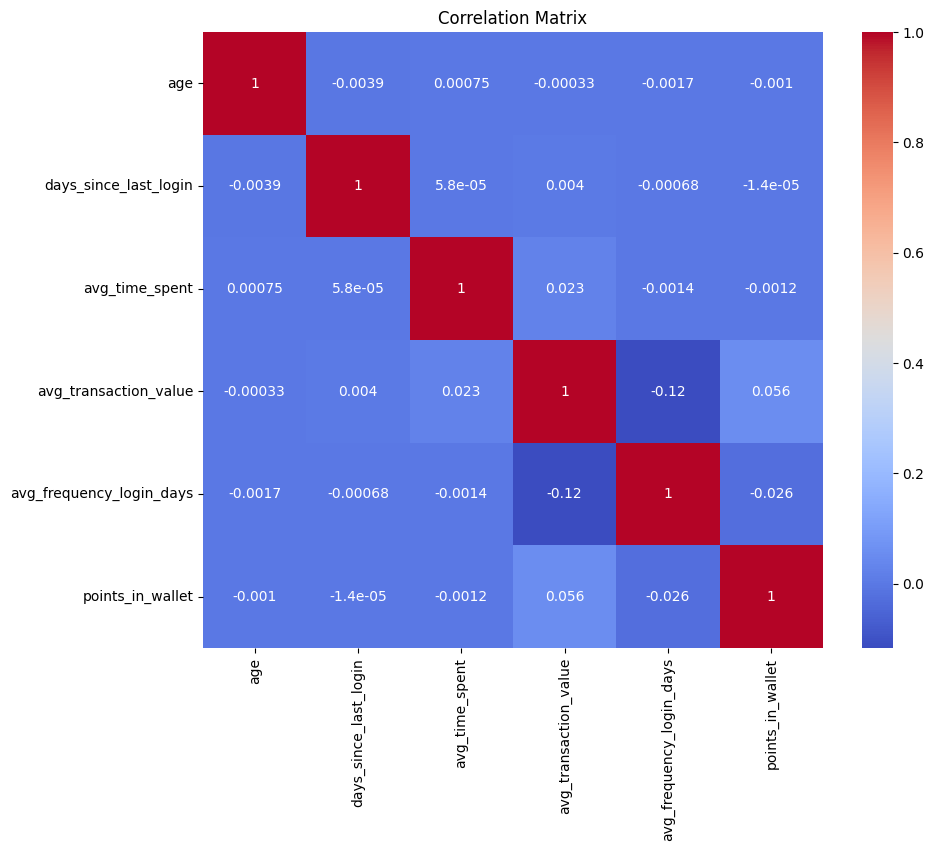

In [13]:
# Create correlation matrix
corr_matrix = data_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Looking at the correlation matrix above, none of the variables exhibit a strong correlation with each other. The correlation coefficients are generally close to zero, indicating weak or no linear relationships between the variables.

Therefore, based on the correlation matrix, there is no immediate need to drop any variables  However, it's important to note that correlation is just one aspect to consider when selecting variables for modeling. Other factors such as domain knowledge, feature importance, and model performance should also be taken into account when deciding which variables to include or drop in the final model.

# 5 - Feature Engineering

## Split between train, test, and val set

In [14]:
# Splitting between X and Y
X = data.drop('churn_risk_score', axis=1)
y = data['churn_risk_score']

In [15]:
# Split between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=20)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=20)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (26739, 21)
Val Size :  (4719, 21)
Test Size :  (5552, 21)


## Handling Missing Value

In [16]:
X_train.isnull().sum()

user_id                            0
age                                0
gender                            43
region_category                 3848
membership_category                0
joining_date                       0
joined_through_referral         3884
preferred_offer_types            211
medium_of_operation             3894
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
dtype: int64

In [17]:
X_val.isnull().sum()

user_id                           0
age                               0
gender                            8
region_category                 726
membership_category               0
joining_date                      0
joined_through_referral         718
preferred_offer_types            39
medium_of_operation             691
internet_option                   0
last_visit_time                   0
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
dtype: int64

In [18]:
X_test.isnull().sum()

user_id                           0
age                               0
gender                            8
region_category                 857
membership_category               0
joining_date                      0
joined_through_referral         840
preferred_offer_types            38
medium_of_operation             810
internet_option                   0
last_visit_time                   0
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
dtype: int64

##  Feature Selection

In [19]:
# Display X_train

X_train

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
30811,800428cd4db6935d,33,M,City,Gold Membership,2017-03-29,No,Without Offers,Desktop,Wi-Fi,...,14,326.43,38026.78,8.000000,728.199859,Yes,No,No,Not Applicable,Poor Customer Service
32377,beee22e628742e08,40,M,Town,Premium Membership,2016-03-09,NaN,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,13,144.60,41787.37,14.000000,753.930000,Yes,No,Yes,Unsolved,No reason specified
12296,922e527b96cc0628,42,F,Village,Platinum Membership,2016-02-12,No,Without Offers,Smartphone,Mobile_Data,...,21,225.90,35794.34,14.000000,330.257449,No,Yes,No,Not Applicable,Poor Product Quality
4013,9acc1cd3f16e92b1,48,M,Town,Basic Membership,2015-06-08,No,Credit/Debit Card Offers,NaN,Mobile_Data,...,15,30.75,19112.92,0.000000,692.250000,Yes,No,No,Not Applicable,Too many ads
30702,8d188666e17335d1,55,M,Town,Gold Membership,2017-04-04,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,...,23,122.35,8333.88,19.000000,0.000000,No,Yes,Yes,No Information Available,No reason specified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2844,abbab9a3c65d40e5,41,F,Town,Basic Membership,2015-07-22,No,Gift Vouchers/Coupons,Smartphone,Mobile_Data,...,23,41.06,8433.81,11.000000,635.460000,No,Yes,Yes,Solved in Follow-up,Poor Product Quality
9288,9f054c65935b9dbe,32,F,City,Platinum Membership,2015-07-02,No,Without Offers,Desktop,Fiber_Optic,...,4,177.73,2099.77,13.000000,798.700000,No,Yes,No,Not Applicable,Products always in Stock
32919,82218b88a36f7bb7,26,F,Village,Basic Membership,2016-08-16,Yes,Without Offers,Desktop,Fiber_Optic,...,13,0.00,33464.75,2.614214,646.860000,No,Yes,No,Not Applicable,Too many ads
7756,bff07003d560f0c1,45,M,City,Platinum Membership,2016-06-08,No,Credit/Debit Card Offers,Desktop,Wi-Fi,...,23,206.31,89951.03,6.000000,776.720000,No,Yes,No,Not Applicable,User Friendly Website


In [20]:
# Drop Columns
X_train.drop(['user_id', 'joining_date','last_visit_time'], axis=1, inplace=True)
X_val.drop(['user_id', 'joining_date','last_visit_time'], axis=1, inplace=True)
X_test.drop(['user_id', 'joining_date','last_visit_time'], axis=1, inplace=True)
X_train

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
30811,33,M,City,Gold Membership,No,Without Offers,Desktop,Wi-Fi,14,326.43,38026.78,8.000000,728.199859,Yes,No,No,Not Applicable,Poor Customer Service
32377,40,M,Town,Premium Membership,NaN,Credit/Debit Card Offers,Desktop,Fiber_Optic,13,144.60,41787.37,14.000000,753.930000,Yes,No,Yes,Unsolved,No reason specified
12296,42,F,Village,Platinum Membership,No,Without Offers,Smartphone,Mobile_Data,21,225.90,35794.34,14.000000,330.257449,No,Yes,No,Not Applicable,Poor Product Quality
4013,48,M,Town,Basic Membership,No,Credit/Debit Card Offers,NaN,Mobile_Data,15,30.75,19112.92,0.000000,692.250000,Yes,No,No,Not Applicable,Too many ads
30702,55,M,Town,Gold Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,23,122.35,8333.88,19.000000,0.000000,No,Yes,Yes,No Information Available,No reason specified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2844,41,F,Town,Basic Membership,No,Gift Vouchers/Coupons,Smartphone,Mobile_Data,23,41.06,8433.81,11.000000,635.460000,No,Yes,Yes,Solved in Follow-up,Poor Product Quality
9288,32,F,City,Platinum Membership,No,Without Offers,Desktop,Fiber_Optic,4,177.73,2099.77,13.000000,798.700000,No,Yes,No,Not Applicable,Products always in Stock
32919,26,F,Village,Basic Membership,Yes,Without Offers,Desktop,Fiber_Optic,13,0.00,33464.75,2.614214,646.860000,No,Yes,No,Not Applicable,Too many ads
7756,45,M,City,Platinum Membership,No,Credit/Debit Card Offers,Desktop,Wi-Fi,23,206.31,89951.03,6.000000,776.720000,No,Yes,No,Not Applicable,User Friendly Website


we dropping 'user_id', 'joining_date', and 'last_visit_time' because it represents a unique identifier for each user and The specific date or time of joining might not be directly related to the churn prediction. also by dropping this feature can help simplify the model, reduce noise, and focus on more relevant features that are expected to have a stronger influence on churn prediction.

## Get numerical and categorical coloumn

In [21]:
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print( 'numerical columns: ', num_columns)
print( 'categorical columns: ', cat_columns)

numerical columns:  ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']
categorical columns:  ['gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']


## Pipeline FE

In [22]:
#create a pipeline
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy = 'most_frequent'), OneHotEncoder())

final_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

In [23]:
# Fit and Transform
X_train = final_pipeline.fit_transform(X_train)
X_val = final_pipeline.transform(X_val)
X_test = final_pipeline.transform(X_test)
X_train.shape

(26739, 48)

## Input data pipeline

In [24]:
#ingest preprocessed data
df_train = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(len(X_train)).batch(30)
df_val = tf.data.Dataset.from_tensor_slices((X_val, y_val)).shuffle(len(X_val)).batch(30)
df_test = tf.data.Dataset.from_tensor_slices((X_test, y_test)).shuffle(len(X_test)).batch(30)

# 6 - Sequential API

## Model Definition

In [25]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [26]:
# Create Sequential model
model_sequential = Sequential()

# Add layers to the model
model_sequential.add(Dense(20, 
                           activation='relu', 
                           kernel_initializer=tf.keras.initializers.HeNormal(seed), 
                           input_shape=(48,))) # Hidden Layer 1
model_sequential.add(Dense(1, 
                           activation='sigmoid', 
                           kernel_initializer=tf.keras.initializers.GlorotNormal(seed))) # Output Layer

# Compile the model
model_sequential.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                980       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________


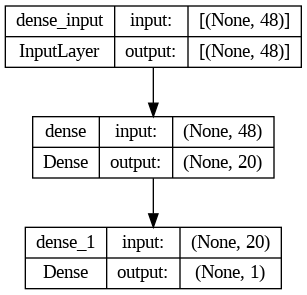

In [27]:
# Plot Layers

tf.keras.utils.plot_model(model_sequential, show_shapes=True)

## Model Training

In [28]:
# Train the Model
%%time
history_seq = model_sequential.fit(df_train,
                                   epochs=30,
                                   validation_data=df_val,
                                   batch_size=32)

Epoch 1/30
892/892 [==============================] - 10s 4ms/step - loss: 0.4018 - accuracy: 0.8014 - val_loss: 0.2738 - val_accuracy: 0.8510
Epoch 2/30
892/892 [==============================] - 4s 4ms/step - loss: 0.2585 - accuracy: 0.8618 - val_loss: 0.2660 - val_accuracy: 0.8574
Epoch 3/30
892/892 [==============================] - 3s 4ms/step - loss: 0.2539 - accuracy: 0.8598 - val_loss: 0.2640 - val_accuracy: 0.8633
Epoch 4/30
892/892 [==============================] - 4s 5ms/step - loss: 0.2516 - accuracy: 0.8646 - val_loss: 0.2612 - val_accuracy: 0.8589
Epoch 5/30
892/892 [==============================] - 3s 4ms/step - loss: 0.2488 - accuracy: 0.8733 - val_loss: 0.2592 - val_accuracy: 0.8656
Epoch 6/30
892/892 [==============================] - 3s 4ms/step - loss: 0.2473 - accuracy: 0.8760 - val_loss: 0.2607 - val_accuracy: 0.8642
Epoch 7/30
892/892 [==============================] - 4s 4ms/step - loss: 0.2459 - accuracy: 0.8826 - val_loss: 0.2575 - val_accuracy: 0.8731
Epoch

## Model Evaluation

In [29]:
# Create DataFrame

history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.401837,0.801376,0.273823,0.851028
1,0.258533,0.861850,0.265967,0.857385
2,0.253896,0.859755,0.264041,0.863319
3,0.251634,0.864580,0.261204,0.858868
4,0.248783,0.873294,0.259245,0.865650
5,0.247338,0.876024,0.260712,0.864166
6,0.245885,0.882569,0.257478,0.873066
7,0.244912,0.886421,0.256945,0.873914
8,0.243958,0.887804,0.257179,0.870947
9,0.243102,0.889899,0.258879,0.873066


<Axes: >

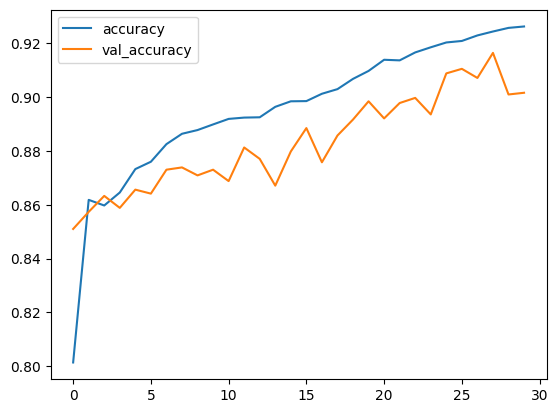

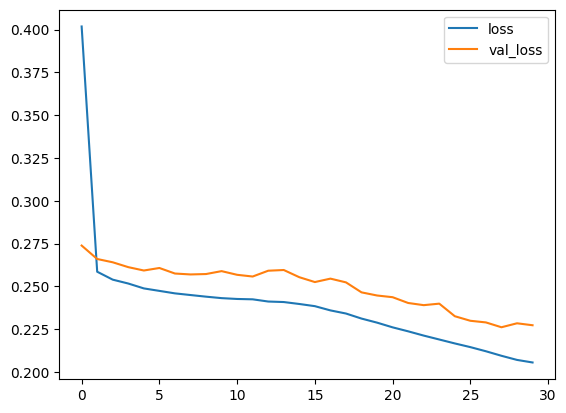

In [30]:
# Plot Training Results

history_seq_df[['accuracy', 'val_accuracy']].plot()
history_seq_df[['loss', 'val_loss']].plot()

In [31]:
# Model Evaluation of test-set
y_pred_seq = model_sequential.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

174/174 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      2524
           1       0.93      0.90      0.91      3028

    accuracy                           0.91      5552
   macro avg       0.91      0.91      0.91      5552
weighted avg       0.91      0.91      0.91      5552



From the updated classification report above, we can see that:

Precision: Precision is a measure of how many correctly predicted positive instances (churned customers) out of all positive predictions. For class 0 (non-churned customers), the precision is 0.88, indicating that 88% of the predicted non-churned customers are actually non-churned. For class 1 (churned customers), the precision is 0.93, indicating that 93% of the predicted churned customers are actually churned.

Recall: Recall is a measure of how many correctly predicted positive instances (churned customers) out of all actual positive instances. For class 0, the recall is 0.92, indicating that 92% of the actual non-churned customers are correctly identified. For class 1, the recall is 0.90, indicating that 90% of the actual churned customers are correctly identified.

F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of model performance. For class 0, the F1-score is 0.90, and for class 1, the F1-score is 0.91.

Accuracy: The accuracy of the model on the test dataset is 0.91, meaning that it correctly predicts the churn risk score for 91% of the customers.

Macro avg and weighted avg: These metrics provide the average values for precision, recall, and F1-score, taking into account the class distribution. The macro avg F1-score and weighted avg F1-score are both 0.91, indicating a good overall performance of the model.

Based on these metrics, the model still shows promising results in predicting the churn risk score, with high precision, recall, and F1-score for both churned and non-churned customers, although slightly lower than the previous model. It is important to consider the trade-off between precision and recall depending on the specific needs of the business problem at hand.

Based on these metrics, the model shows promising results in predicting the churn risk score, with high precision, recall, and F1-score for both churned and non-churned customers.

# 7 - Functional API

## Model Definition

In [52]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [53]:
# Create Functional Model
input_layer = Input(shape=(48,))
hidden_layer_1 = Dense(10, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(input_layer)
output_layer = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(hidden_layer_1)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])
model_functional.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48)]              0         
                                                                 
 dense (Dense)               (None, 10)                490       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


## Model Training

In [54]:
# Train the Model

%%time
history_func = model_functional.fit(df_train,
                                    epochs=30,
                                    validation_data=df_val,
                                    batch_size=32)

Epoch 1/30
892/892 [==============================] - 5s 4ms/step - loss: 0.4259 - accuracy: 0.7933 - val_loss: 0.2843 - val_accuracy: 0.8474
Epoch 2/30
892/892 [==============================] - 3s 3ms/step - loss: 0.2633 - accuracy: 0.8584 - val_loss: 0.2671 - val_accuracy: 0.8487
Epoch 3/30
892/892 [==============================] - 3s 3ms/step - loss: 0.2556 - accuracy: 0.8590 - val_loss: 0.2630 - val_accuracy: 0.8599
Epoch 4/30
892/892 [==============================] - 3s 4ms/step - loss: 0.2540 - accuracy: 0.8636 - val_loss: 0.2624 - val_accuracy: 0.8466
Epoch 5/30
892/892 [==============================] - 4s 4ms/step - loss: 0.2529 - accuracy: 0.8611 - val_loss: 0.2641 - val_accuracy: 0.8478
Epoch 6/30
892/892 [==============================] - 3s 3ms/step - loss: 0.2520 - accuracy: 0.8627 - val_loss: 0.2594 - val_accuracy: 0.8614
Epoch 7/30
892/892 [==============================] - 3s 3ms/step - loss: 0.2511 - accuracy: 0.8664 - val_loss: 0.2588 - val_accuracy: 0.8593
Epoch 

## Model Evaluation 

In [55]:
# Create DataFrame

history_func_df = pd.DataFrame(history_func.history)
history_func_df

,loss,accuracy,val_loss,val_accuracy
0,0.425903,0.793298,0.284291,0.847425
1,0.263330,0.858446,0.267064,0.848697
2,0.255609,0.859007,0.263049,0.859928
3,0.253969,0.863607,0.262432,0.846578
4,0.252870,0.861139,0.264141,0.847849
5,0.252024,0.862710,0.259374,0.861411
6,0.251123,0.866375,0.258834,0.859292
7,0.249378,0.870302,0.258693,0.865861
8,0.247748,0.879801,0.256704,0.873278
9,0.246822,0.884887,0.255597,0.880271


<Axes: >

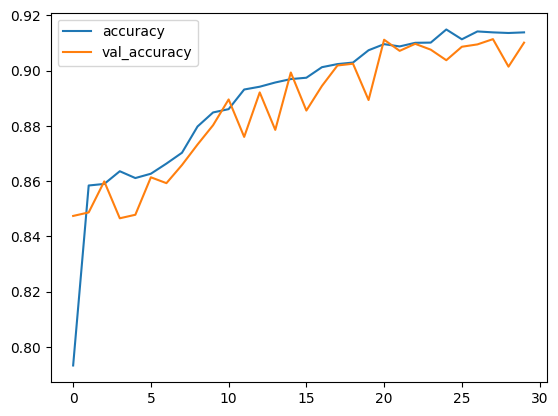

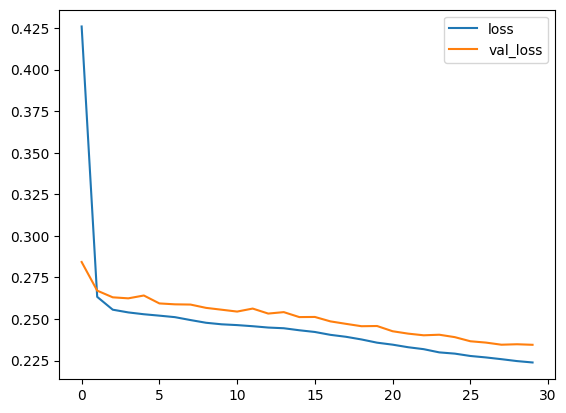

In [56]:
# Plot Training Results

history_func_df[['accuracy', 'val_accuracy']].plot()
history_func_df[['loss', 'val_loss']].plot()

In [57]:
# Evaluate Test-Set

y_pred_func = model_functional.predict(X_test)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_func))

174/174 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      2524
           1       0.89      0.95      0.92      3028

    accuracy                           0.91      5552
   macro avg       0.92      0.91      0.91      5552
weighted avg       0.91      0.91      0.91      5552



From the classification report above, we can see :

- Precision: For class 0 (non-churned customers), the precision is 0.94, indicating that 94% of the predicted non-churned customers are actually non-churned. For class 1 (churned customers), the precision is 0.89, indicating that 89% of the predicted churned customers are actually churned.

- Recall: For class 0, the recall is 0.86, indicating that 86% of the actual non-churned customers are correctly identified. For class 1, the recall is 0.95, indicating that 95% of the actual churned customers are correctly identified.

- F1-score: The F1-score is 0.90 for class 0 and 0.92 for class 1. The F1-score is the harmonic mean of precision and recall, providing a balanced measure of model performance.

- Accuracy: The accuracy of the model on the test dataset is 0.91, meaning that it correctly predicts the churn risk score for 91% of the customers.

- Macro avg and weighted avg: The macro avg F1-score and weighted avg F1-score are both 0.91, indicating a good overall performance of the model.

Based on these metrics, the model with the functional API and batch normalization shows promising results in predicting the churn risk score, with high precision, recall, and F1-score for both churned and non-churned customers.






# 8 - Model Improvement 

## Improve for Sequential API

In [40]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [41]:
# Create Sequential model
model_sequential_imp = Sequential()

# Add layers to the model
model_sequential_imp.add(Dense(16, 
                           activation='relu', 
                           kernel_initializer=tf.keras.initializers.HeNormal(seed), 
                           input_shape=(48,),
                           name='hidden_layer1')) # Hidden Layer 1
model_sequential_imp.add(BatchNormalization(name='batch_norm1'))  # Batch Normalization layer
model_sequential_imp.add(Dense(8, 
                           activation='relu', 
                           kernel_initializer=tf.keras.initializers.HeNormal(seed),
                           name='hidden_layer2')) # Hidden Layer 2
model_sequential_imp.add(BatchNormalization(name='batch_norm2'))  # Batch Normalization layer
model_sequential_imp.add(Dense(1, 
                           activation='sigmoid', 
                           kernel_initializer=tf.keras.initializers.GlorotNormal(seed),
                           name='output_layer')) # Output Layer

# Compile the model
model_sequential_imp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model_sequential_imp.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 16)                784       
                                                                 
 batch_norm1 (BatchNormaliza  (None, 16)               64        
 tion)                                                           
                                                                 
 hidden_layer2 (Dense)       (None, 8)                 136       
                                                                 
 batch_norm2 (BatchNormaliza  (None, 8)                32        
 tion)                                                           
                                                                 
 output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 1,025
Trainable params: 977
Non-trainable 

In [42]:
# Train the Model
%%time
history_seq_imp = model_sequential_imp.fit(df_train,
                                   epochs=50,
                                   validation_data=df_val)

Epoch 1/50
892/892 [==============================] - 7s 5ms/step - loss: 0.4207 - accuracy: 0.7831 - val_loss: 0.2838 - val_accuracy: 0.8483
Epoch 2/50
892/892 [==============================] - 5s 6ms/step - loss: 0.2879 - accuracy: 0.8523 - val_loss: 0.2733 - val_accuracy: 0.8483
Epoch 3/50
892/892 [==============================] - 5s 5ms/step - loss: 0.2795 - accuracy: 0.8541 - val_loss: 0.2683 - val_accuracy: 0.8487
Epoch 4/50
892/892 [==============================] - 4s 5ms/step - loss: 0.2770 - accuracy: 0.8532 - val_loss: 0.2709 - val_accuracy: 0.8478
Epoch 5/50
892/892 [==============================] - 5s 6ms/step - loss: 0.2748 - accuracy: 0.8531 - val_loss: 0.2730 - val_accuracy: 0.8515
Epoch 6/50
892/892 [==============================] - 5s 5ms/step - loss: 0.2712 - accuracy: 0.8573 - val_loss: 0.2688 - val_accuracy: 0.8525
Epoch 7/50
892/892 [==============================] - 5s 6ms/step - loss: 0.2702 - accuracy: 0.8552 - val_loss: 0.2676 - val_accuracy: 0.8468
Epoch 

In [43]:
# Create DataFrame

history_seq_imp_df = pd.DataFrame(history_seq_imp.history)
history_seq_imp_df

,loss,accuracy,val_loss,val_accuracy
0,0.420748,0.783051,0.283831,0.848273
1,0.287909,0.852276,0.273309,0.848273
2,0.279499,0.854071,0.268257,0.848697
3,0.276971,0.853173,0.270876,0.847849
4,0.274791,0.853098,0.272969,0.851452
5,0.271151,0.857324,0.268808,0.852511
6,0.270193,0.855155,0.267577,0.846790
7,0.266267,0.857624,0.261906,0.864802
8,0.260596,0.864393,0.262509,0.868404
9,0.255273,0.877183,0.255147,0.895529


In [44]:
# Model Evaluation of test-set
y_pred_seq_imp = model_sequential_imp.predict(X_test)
y_pred_seq_imp = np.where(y_pred_seq_imp >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq_imp))

174/174 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2524
           1       0.93      0.93      0.93      3028

    accuracy                           0.92      5552
   macro avg       0.92      0.92      0.92      5552
weighted avg       0.92      0.92      0.92      5552



## Improve for Functional API

In [45]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [46]:
# Create Functional Model
input_layer = Input(shape=(48,))
hidden_layer_1 = Dense(16, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(input_layer)
batch_norm_1 = BatchNormalization()(hidden_layer_1)
hidden_layer_2 = Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(batch_norm_1)
batch_norm_2 = BatchNormalization()(hidden_layer_2)
output_layer = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(batch_norm_2)

model_functional_imp = Model(inputs=input_layer, outputs=output_layer)

#compile the model
model_functional_imp.compile(loss='binary_crossentropy',
                             optimizer='adam',
                             metrics=['accuracy'])

#print model summary
model_functional_imp.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48)]              0         
                                                                 
 dense (Dense)               (None, 16)                784       
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 batch_normalization_1 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 1)                 9     

In [47]:
# Train the Model
%%time
history_func_imp = model_functional_imp.fit(df_train,
                                   epochs=50,
                                   validation_data=df_val)

Epoch 1/50
892/892 [==============================] - 8s 6ms/step - loss: 0.4191 - accuracy: 0.7857 - val_loss: 0.2840 - val_accuracy: 0.8506
Epoch 2/50
892/892 [==============================] - 4s 5ms/step - loss: 0.2886 - accuracy: 0.8507 - val_loss: 0.2777 - val_accuracy: 0.8432
Epoch 3/50
892/892 [==============================] - 5s 5ms/step - loss: 0.2808 - accuracy: 0.8538 - val_loss: 0.2706 - val_accuracy: 0.8481
Epoch 4/50
892/892 [==============================] - 5s 5ms/step - loss: 0.2770 - accuracy: 0.8548 - val_loss: 0.2716 - val_accuracy: 0.8517
Epoch 5/50
892/892 [==============================] - 4s 5ms/step - loss: 0.2750 - accuracy: 0.8525 - val_loss: 0.2684 - val_accuracy: 0.8495
Epoch 6/50
892/892 [==============================] - 5s 6ms/step - loss: 0.2691 - accuracy: 0.8583 - val_loss: 0.2665 - val_accuracy: 0.8523
Epoch 7/50
892/892 [==============================] - 4s 5ms/step - loss: 0.2664 - accuracy: 0.8606 - val_loss: 0.2634 - val_accuracy: 0.8553
Epoch 

In [50]:
# Create DataFrame

history_func_imp_df = pd.DataFrame(history_func_imp.history)
history_func_imp_df

,loss,accuracy,val_loss,val_accuracy
0,0.419072,0.785669,0.283999,0.850604
1,0.288603,0.850668,0.277684,0.843187
2,0.280811,0.853772,0.270639,0.848061
3,0.277029,0.854819,0.271635,0.851663
4,0.275043,0.852463,0.268369,0.849544
5,0.269136,0.858334,0.266468,0.852299
6,0.266408,0.860616,0.263369,0.855266
7,0.262734,0.865328,0.259354,0.866073
8,0.253323,0.879951,0.254369,0.871159
9,0.238141,0.897902,0.223589,0.909303


In [51]:
# Model Evaluation of test-set
y_pred_func_imp = model_functional_imp.predict(X_test)
y_pred_func_imp = np.where(y_pred_func_imp >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_func_imp))

174/174 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      2524
           1       0.93      0.92      0.93      3028

    accuracy                           0.92      5552
   macro avg       0.92      0.92      0.92      5552
weighted avg       0.92      0.92      0.92      5552



# 9 - Model Saving

Based on the evaluation metrics, both the improved models (Sequential and Functional) outperform the base models. They achieve higher accuracy, precision, recall, and F1-scores for both classes. So for the deployment we will use the best improved model which is the sequential improved model

In [58]:
# Save Pipeline
with open('pipeline.pkl', 'wb') as file_1:
  pickle.dump(final_pipeline, file_1)

In [59]:
# Freezing
model_sequential_imp.trainable = False
model_sequential_imp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 16)                784       
                                                                 
 batch_norm1 (BatchNormaliza  (None, 16)               64        
 tion)                                                           
                                                                 
 hidden_layer2 (Dense)       (None, 8)                 136       
                                                                 
 batch_norm2 (BatchNormaliza  (None, 8)                32        
 tion)                                                           
                                                                 
 output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 1,025
Trainable params: 0
Non-trainable pa

In [60]:
# Save ANN Model

model_sequential.save('churn_model.h5')

# 10 - Model Inference

head over to inference.ipynb to see the model inference

In [64]:
print(data.columns)


Index(['user_id', 'age', 'gender', 'region_category', 'membership_category',
       'joining_date', 'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')


# 11 - Conclusion

## Model analysis

1. Model Evaluation Analysis:

   a. Accuracy: Accuracy measures how well the model predicts the churn and non-churn classes. A higher accuracy indicates a better ability to predict churn risk. In the evaluation results, the accuracy of all models ranges from 0.91-0.92, indicating that approximately 91-92% of churn risk predictions are correct.
   
   b. Precision: Precision measures the proportion of true positive predictions (churn) out of all positive predictions. A high precision indicates that the model has fewer false positives. In the evaluation results, the precision for the churn class ranges from 0.89-0.93, meaning that approximately 89-93% of churn risk predictions are correct.
   
   c. Recall: Recall measures the proportion of true positive predictions (churn) out of all actual churn instances. A high recall indicates that the model has fewer false negatives. In the evaluation results, the recall for the churn class ranges from 0.90-0.95, meaning that approximately 90-95% of actual churn instances are correctly identified.
   
   d. F1-score: The F1-score is the harmonic mean of precision and recall, providing a balanced measure of model performance. In the evaluation results, the F1-score for the churn class ranges from 0.91-0.93, indicating good performance in predicting churn risk.
   

2. Weaknesses and Strengths of the Model:

   a. Weaknesses:
      - One weakness of the model is the lack of representation of data in terms of data gaps that may not be well captured in the available dataset.
      - The model can be prone to overfitting if there are no control mechanisms such as the use of regularization or the addition of dropout layers.
      
   b. Strengths:
      - The model has achieved high accuracy in predicting churn risk, providing a strong indication of the potential for customers to churn.
      - The use of techniques such as batch normalization, activation functions, and the addition of hidden layers has helped improve the model's performance in predicting churn risk.

3. Statement for Further Improvement:

   - Utilize techniques such as k-fold cross-validation and grid search to find optimal combinations of hyperparameters and improve the model's generalization.
   - Conduct further analysis on the most influential features in predicting churn risk to perform feature selection or engineering and enhance the model's performance.
   - Test the model on larger and more diverse datasets to obtain a more accurate understanding of customer churn behavior.
   - Implement ensemble learning techniques, such as random forest or gradient boosting, to combine the results of multiple models and improve the accuracy of churn risk predictions.

## Overall analysis

In conclusion, 

We implemented two types of models: Sequential and Functional, and evaluated their performance using classification metrics such as accuracy, precision, recall, and F1-score. We also compared the base models with improved models by incorporating activation functions, batch normalization, and additional hidden layers.

Based on the evaluation, we found that the improved models (both Sequential and Functional) performed better than the base models. They achieved higher accuracy and improved precision, recall, and F1-scores for predicting churned customers. These models provide a valuable tool for the company to identify customers who are at a higher risk of churning and take proactive measures to retain them.

 Additionally, continuous monitoring and retraining of the model with new data can help maintain its effectiveness over time.

Overall, this project demonstrates the application of machine learning techniques to predict customer churn and provides insights for the company to take targeted actions to reduce churn and enhance customer retention.